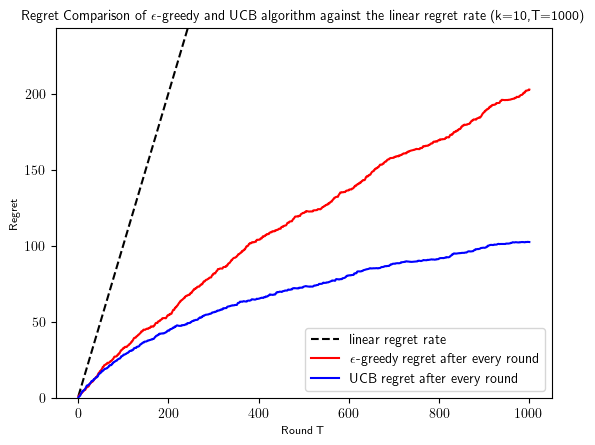

In [1]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['text.usetex'] = True
import pandas as pd 
import random
k = 10   #number of arms
T = 1000  #horizon  

#bandit reward distribution
a = np.random.uniform(0,1,(k,));
b = np.zeros((k,));
for i in range(k):
    b[i]=np.random.uniform(a[i],1)
    
mean = (a+b)/2
best_arm = np.argmax(mean)

#this code implements e-greedy algorithm
epsilon = 1; 
t = 0;
bandit_scores_eg = np.zeros((k,T)) #total score of each arm for T rounds
inst_score_eg = np.zeros((T,)) #reward for round t
alg_score_eg = np.zeros((T,)) #cumulative reward for round t
regret_eg =  np.zeros((T,)) #regret_eg for round t
T_regret_eg = 0 #regret_eg after t rounds
mu_estimate_eg = np.zeros((k,)) #estimate of each arm 
cum_score_eg = 0 #cumulative score


for t in range(T):

    #Choose next arm
    chance = np.random.uniform(0,1);
    if chance < epsilon :
        bandit_i  = np.random.randint(0,high=k-1)
    else :
        bandit_i = np.argmax(mu_estimate_eg) 
        
    #Calculate current arm score, regret
    score = np.random.uniform(a[bandit_i], b[bandit_i])
    inst_score_eg[t] = score
    alg_score_eg[t] = cum_score_eg + score
    cum_score_eg += score
    regret_eg[t] = (t+1)*mean[best_arm] - cum_score_eg
    bandit_scores_eg[bandit_i,t] = score
    mu_estimate_eg[bandit_i] = np.sum(bandit_scores_eg[bandit_i])/np.count_nonzero(bandit_scores_eg[bandit_i])
    
    #Update epsilon
    epsilon = ((t+1)**(-1/3))*((k*np.log(t+1))**(1/3))
    
    
T_regret_eg = T*mean[best_arm] - np.sum(inst_score_eg)


#this code implements UCB algorithm
t = 0;
bandit_scores_ucb = np.zeros((k,T)) #total score of each arm for T rounds
inst_score_ucb = np.zeros((T,)) #reward for round t
alg_score_ucb = np.zeros((T,)) #cumulative reward for round t
regret_ucb =  np.zeros((T,)) #regret_eg for round t
T_regret_ucb = 0 #regret_eg after t rounds
mu_estimate_ucb = np.zeros((k,)) #estimate of each arm
q_estimate = np.zeros((k,))
X = np.zeros((k,))
cum_score_ucb = 0 #cumulative score
ucb = np.zeros((k,)) + np.Inf

chosen_bandits = np.zeros((T,))
for t in range(T):
    
    bandit_i = np.argmax(ucb)
    chosen_bandits[t] = bandit_i
    
    #Calculate current arm score, regret
    score = np.random.uniform(a[bandit_i], b[bandit_i])
    inst_score_ucb[t] = score
    alg_score_ucb[t] = cum_score_ucb + score
    cum_score_ucb += score
    regret_ucb[t] = (t+1)*mean[best_arm] - cum_score_ucb
    bandit_scores_ucb[bandit_i,t] = score
    
    #Choose next arm
    X[bandit_i] = np.count_nonzero(bandit_scores_ucb[bandit_i])
    q_estimate[bandit_i] = np.sum(X[bandit_i])
    mu_estimate_ucb[bandit_i] = np.sum(bandit_scores_ucb[bandit_i])/q_estimate[bandit_i]
    ucb[bandit_i] = mu_estimate_ucb[bandit_i] + np.sqrt(np.log(T)/q_estimate[bandit_i])
    
    
T_regret_ucb = T*mean[best_arm] - np.sum(inst_score_ucb)

#Plots
maximum_regret = np.amax( np.array([regret_eg[T-1],regret_ucb[T-1]]) ) 
x_axis = np.arange(1,T+1)

"""
fig0 = plt.figure()
ax = plt.gca()
ax.plot(x_axis, alg_score_eg,'r', label=r'$\epsilon$-greedy cumulative score per round')
ax.plot(x_axis, alg_score_ucb,'b', label='UCB cumulative score per round')
plt.xlabel("Round T")
plt.ylabel("Total score") 
ax.legend()
plt.show()
"""

fig1 = plt.figure()
ax = plt.gca()
ax.plot(x_axis, x_axis,'k--', label='linear regret rate')
ax.plot(x_axis, regret_eg,'r', label=r'$\epsilon$-greedy regret after every round')
ax.plot(x_axis, regret_ucb,'b', label='UCB regret after every round')
plt.ylim(0,1.2*maximum_regret)
plt.xlabel("Round T", fontsize = 8)
plt.ylabel("Regret", fontsize = 8) 
ax.set_title(r'Regret Comparison of $\epsilon$-greedy and UCB algorithm against the linear regret rate (k=%i,' % k + r'T=%i)' % T, fontsize = 10)
ax.legend()
#plt.savefig('fig10.png')
plt.show()